# Test Data

In the "[02-Data Import.ipynb](https://github.com/Galeforse/DST-Assessment-02/blob/main/Report/02%20-%20Data%20Import.ipynb)", we randomly sampled 5% from all the dataset, whose name is "5_percent_data.csv.gz". This dataset can be used to predict missing values, but the biggest problem is that we do not know the true value of the missing data, so it is difficult to evaluate the prediction performance of the model.

In order to solve the above problem, we select a dataset with complete data and artificially generate missing values, so that we can compare the results of predicting missing values with the true values to create the suitable performance metrics.

In [5]:
library("VIM")
library("crunch")

We firstly read the "5_percent_data.csv.gz" and do some simple processing.

In [3]:
setwd("C:\\Users\\xiao\\Documents\\GitHub\\DST-Assessment-02\\Data")
conndata<-read.table("5_percent_data.csv.gz", sep=",", header=TRUE, na.strings=c("","NA"))

In [6]:
for(i in c(3,5,8,9,10,12,14:17)) conndata[,i]=as.numeric(conndata[,i])
for(i in c(2,4,6,11,13)) conndata[,i]=as.factor(conndata[,i])

Then we observe the distribution of missing values. Since this dataset is randomly selected from the total data and the number of data is sufficient, the distribution of the two is almost the same.


 Variables sorted by number of missings: 
   Variable     Count
    service 0.9704737
   duration 0.8281686
 orig_bytes 0.8281686
 resp_bytes 0.8281686


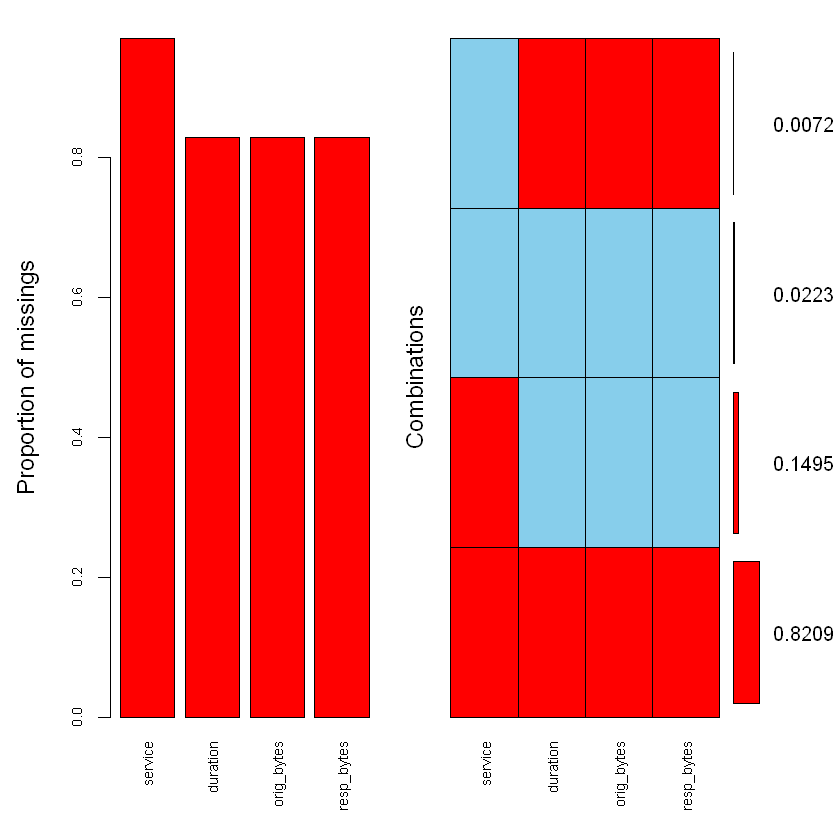

In [30]:
mice_plot <- aggr(conndata[,which(names(conndata) %in% c("service","duration","orig_bytes","resp_bytes"))],
                  numbers=TRUE, sortVars=TRUE,cex.axis=.7,gap=3)

The three numerical variables with missing values include "duration", "orig_bytes" and "resp_bytes", which are the targets of our prediction in this assessment. It can be seen that them are either present or missing at the same time, and the missing value is about 82.8%.

Then we extract the data that these three variables are not missing。

In [9]:
data.complete<-conndata[-which(is.na(conndata$duration)),]

In [10]:
nrow(data.complete)

[1] 194980

It has a total of 194980 data.

When artificially generating missing data, in order to ensure that the distribution of it is as same as the original dataset, we set the same missing rate for these three variables.

In [35]:
data.missing <- data.complete
set.seed(10)
data.missing[sample(1:nrow(data.missing),nrow(data.missing)*0.8281686),"duration"] <- NA

In [36]:
data.missing[is.na(data.missing$duration),"orig_bytes"] <- NA
data.missing[is.na(data.missing$duration),"resp_bytes"] <- NA

In [37]:
head(data.missing)

,ts,orig_ip,orig_port,resp_ip,resp_port,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,1331915797,192.168.202.102,2633,192.168.23.202,80,tcp,http,NA,NA,NA,RSTO,0,ShADadfR,8,813,9,8505
13,1331921224,192.168.202.102,4094,192.168.24.101,80,tcp,NA,0.01,7085,172,RSTO,0,ShADadfR,10,7497,9,544
18,1331903910,192.168.202.110,16066,192.168.27.152,12486,tcp,NA,NA,NA,NA,REJ,0,Sr,1,48,1,40
27,1331988939,192.168.204.45,42997,192.168.23.1,28745,tcp,NA,NA,NA,NA,REJ,0,Sr,1,60,1,40
29,1331918792,192.168.202.110,38566,192.168.229.252,32754,tcp,NA,NA,NA,NA,REJ,0,Sr,1,48,1,40
31,1331901863,192.168.202.79,63805,192.168.229.252,45078,tcp,NA,NA,NA,NA,REJ,0,Sr,1,44,1,40



 Variables sorted by number of missings: 
   Variable     Count
    service 0.8701969
   duration 0.8281670
 orig_bytes 0.8281670
 resp_bytes 0.8281670


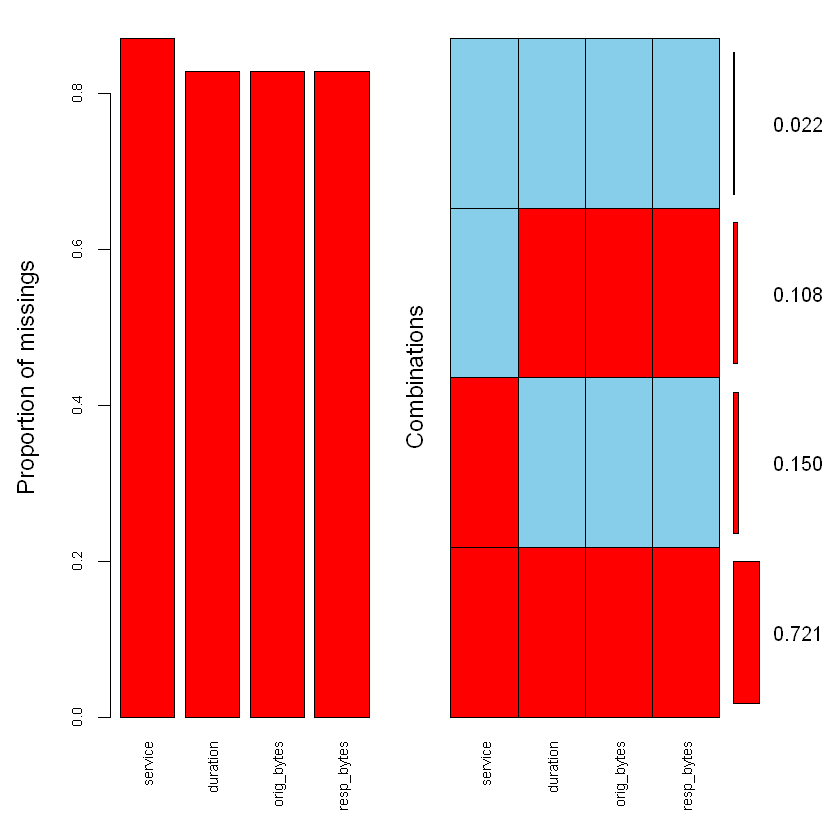

In [38]:
mice_plot <- aggr(data.missing[,which(names(data.missing) %in% c("service","duration","orig_bytes","resp_bytes"))],
                  numbers=TRUE, sortVars=TRUE,cex.axis=.7,gap=3)

We can see that The new test dataset has almost the same proportions of missing values for three numeric variables as the original dataset, we can think that the distribution of the two datasets is approximate, so that the model which applies to test data also applies to actual data.

Then we save the file.

In [44]:
write.csv.gz(data.missing,"test_missing1.csv.gz",row.names=FALSE)

In [45]:
write.csv.gz(data.complete,"test_complete1.csv.gz",row.names=FALSE)

## Considering outliers

In the "[05-Further DA and Mean Impute.ipynb](https://github.com/Galeforse/DST-Assessment-02/blob/main/Report/05%20-%20Further%20DA%20and%20Mean%20Impute.ipynb)", we analyzed the outliers in detail, here we only carry out a simple analysis.

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"83 y values <= 0 omitted from logarithmic plot"


breaks,100,200,300,400,500,600,700,800,900,1000,...,10400,10500,10600,10700,10800,10900,11000,11100,11200,11300
counts,194637,151,40,22,22,17,17,12,10,14,...,0,0,0,0,0,0,0,0,0,1


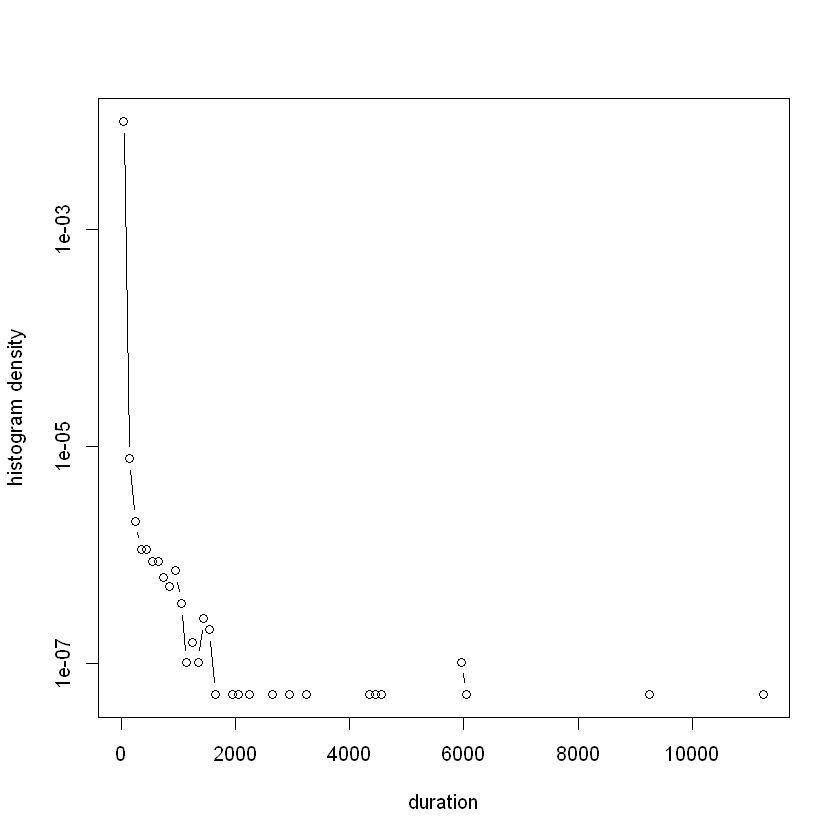

In [11]:
nbreaks=101 
thist1=hist(data.complete[,"duration"],breaks=nbreaks,plot=FALSE)
plot(thist1$mids,thist1$density,log="y",type="b",
     xlab="duration",ylab="histogram density")

breaks1<-thist1$breaks[-1]
df1<-data.frame(breaks=breaks1,counts=thist1$counts)
t(df1)

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"70 y values <= 0 omitted from logarithmic plot"


breaks,50000000,1e+08,1.5e+08,2e+08,2.5e+08,3e+08,3.5e+08,4e+08,4.5e+08,5e+08,...,5e+09,5.05e+09,5.1e+09,5.15e+09,5.2e+09,5.25e+09,5.3e+09,5.35e+09,5.4e+09,5.45e+09
counts,194914,0e+00,2.0e+00,2e+00,3.0e+00,1e+00,1.0e+00,3e+00,3.0e+00,1e+00,...,0e+00,0.00e+00,0.0e+00,0.00e+00,0.0e+00,0.00e+00,0.0e+00,0.00e+00,0.0e+00,1.00e+00


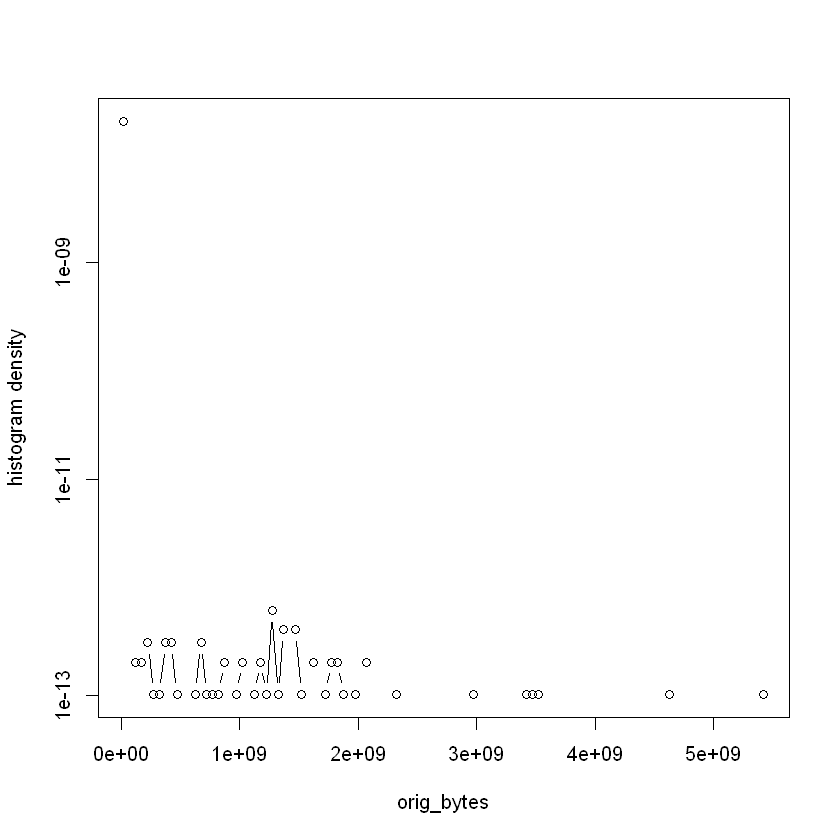

In [12]:
thist2=hist(data.complete[,"orig_bytes"],breaks=nbreaks,plot=FALSE)
plot(thist2$mids,thist2$density,log="y",type="b",
     xlab="orig_bytes",ylab="histogram density")

breaks2<-thist2$breaks[-1]
df2<-data.frame(breaks=breaks2,counts=thist2$counts)
t(df2)

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"61 y values <= 0 omitted from logarithmic plot"


breaks,500000,1000000,1500000,2e+06,2500000,3e+06,3500000,4e+06,4500000,5e+06,...,31500000,3.2e+07,32500000,3.3e+07,33500000,3.4e+07,34500000,3.5e+07,35500000,3.6e+07
counts,194952,13,5,1e+00,3,0e+00,1,0e+00,1,1e+00,...,0,0.0e+00,0,0.0e+00,0,0.0e+00,0,0.0e+00,0,1.0e+00


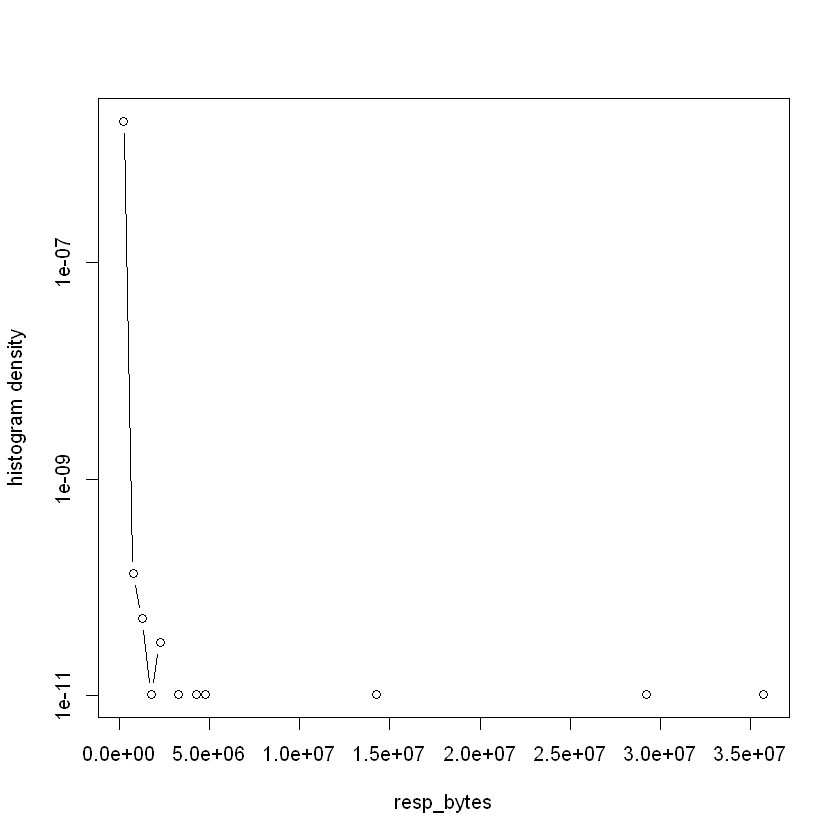

In [13]:
thist3=hist(data.complete[,"resp_bytes"],breaks=nbreaks,plot=FALSE)
plot(thist3$mids,thist3$density,log="y",type="b",
     xlab="resp_bytes",ylab="histogram density")

breaks3<-thist3$breaks[-1]
df3<-data.frame(breaks=breaks3,counts=thist3$counts)
t(df3)

We can know that there are very few but large outliers in the three variables.

In [14]:
a=data.complete[data.complete[,"duration"]<1200,]
nrow(a)/nrow(data_complete)

[1] 0.9998513

In [15]:
b=data.complete[data.complete[,"orig_bytes"]<1000000,]
nrow(b)/nrow(data.complete)

[1] 0.9996512

In [16]:
c=data.complete[data.complete[,"resp_bytes"]<1000000,]
nrow(c)/nrow(data.complete)

[1] 0.9999231

In [17]:
data.c1=data.complete[data.complete[,"duration"]<1200,]
data.c2=data.c1[data.c1[,"orig_bytes"]<1000000,]
data.complete1=data.c2[data.c2[,"resp_bytes"]<1000000,]
nrow(data.complete1)

[1] 194874

We set three thresholds, all of which kept most of the data while removing the outliers. After processing, there are 194874 data remaining.

In [ ]:
data.missing1 <- data.complete1
data.missing1[sample(1:nrow(data.missing1),nrow(data.missing1)*0.8281686),"duration"] <- NA
data.missing1[is.na(data.missing1$duration),"orig_bytes"] <- NA
data.missing1[is.na(data.missing1$duration),"resp_bytes"] <- NA

In [ ]:
write.csv.gz(data.complete1,"test_complete2.csv.gz",row.names=FALSE)

In [ ]:
write.csv.gz(data.missing1,"test_missing2.csv.gz",row.names=FALSE)

Finally we get the second test dataset, which removes some outliers and may improve the prediction performance of the model.